<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB8.%20Pytorch_(III).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch (III)


## 1. Introduction

Early stopping is a widely-used regularization technique in machine learning and deep learning aimed at preventing overfitting during the training process. Here are some key points about early stopping:

1. **Purpose**: The main goal of early stopping is to halt the training of a model once it becomes apparent that the model's performance on a validation set is no longer improving. This helps in ensuring that the model generalizes well to new, unseen data rather than just fitting the training data.

2. **Mechanism**: During training, the model's performance is periodically evaluated on a separate validation dataset. If the validation performance does not improve for a certain number of consecutive epochs (a parameter known as "patience"), the training is stopped. The best weights observed during training are then restored.

3. **Parameters**:
   - **Patience**: This parameter defines the number of epochs to wait for an improvement before stopping. If set to 5, for example, training will stop if there is no improvement in validation performance for 5 epochs.
   - **Minimum Delta**: This parameter sets the minimum change in the monitored metric to qualify as an improvement. This helps to filter out small changes that are not significant.

4. **Benefits**:
   - **Prevents Overfitting**: By stopping early, the model is less likely to fit the noise in the training data, leading to better generalization on unseen data.
   - **Efficiency**: Saves computational resources by not continuing training when improvements are unlikely.
   - **Simplicity**: Easy to implement and does not require modification of the underlying model architecture.

5. **Implementation**: Early stopping is typically implemented using callbacks in deep learning frameworks such as Keras, TensorFlow, and PyTorch. These callbacks monitor the validation metrics and stop training when the criteria are met.

6. **Limitations**: While early stopping is effective, it may not always be the best choice for every model or dataset. For some complex problems, more sophisticated regularization techniques might be required alongside early stopping.

### Using Early Stopping with Tensorflow

In TensorFlow, `tf.keras.callbacks.EarlyStopping` is used to implement early stopping. Steps to Use Early Stopping in TensorFlow are:

1. **Import Required Libraries**:
   First, import TensorFlow and other relevant packages.

   ```python
   import tensorflow as tf
   from tensorflow.keras.callbacks import EarlyStopping
   ```

2. **Define the Model**:
   Define your TensorFlow/Keras model as usual.

   ```python
   model = tf.keras.Sequential([
       tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(1)
   ])
   
   model.compile(optimizer='adam', loss='mse', metrics=['mae'])
   ```

3. **Configure Early Stopping**:
   Set up the `EarlyStopping` callback. You can adjust several parameters such as `monitor`, `patience`, and `min_delta`.

   - `monitor`: Metric to watch (e.g., `'val_loss'`, `'val_accuracy'`).
   - `patience`: Number of epochs with no improvement after which training will be stopped.
   - `min_delta`: Minimum change in the monitored metric to qualify as an improvement.

   ```python
   early_stopping = EarlyStopping(
       monitor='val_loss',  # Can be 'val_loss', 'val_accuracy', etc.
       patience=10,         # Number of epochs with no improvement to stop training
       min_delta=0.001,     # Minimum change to qualify as an improvement
       mode='min',          # Can be 'min', 'max', or 'auto'
       verbose=1
   )
   ```

4. **Train the Model with Early Stopping**:
   Pass the `EarlyStopping` callback to the `fit` method.

   ```python
   history = model.fit(
       x_train, y_train,
       epochs=100,
       validation_data=(x_val, y_val),
       callbacks=[early_stopping]
   )
   ```

You can adjust other parameters of `EarlyStopping` according to your needs:

- `restore_best_weights`: If set to `True`, it will restore the model weights to the epoch with the best monitored metric.

```python
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    mode='min',
    verbose=1,
    restore_best_weights=True
)
```

This configuration ensures that after stopping the training, the model will have the best weights obtained during the training process.

#### Resources and Links

Here are some key resources on early stopping:

1. **Towards AI**: This article provides a comprehensive guide on using early stopping, detailing how to implement it in different machine learning models like GradientBoostingClassifier and SGDRegressor, and also in deep learning models using TensorFlow. It explains parameters such as `monitor`, `patience`, `min_delta`, `mode`, and `restore_best_weights` which are crucial for setting up early stopping effectively [Towards AI](https://towardsai.net/p/machine-learning/pause-for-performance-the-guide-to-using-early-stopping-in-ml-and-dl).

2. **Papers with Code**: This page offers a detailed explanation of early stopping, including its role as a regularization method. It provides insights into how early stopping limits the parameter space exploration, ensuring that the model does not overfit the training data [Papers with Code](https://paperswithcode.com/method/early-stopping).

3. **Machine Learning Mastery**: This resource provides practical advice and code examples for implementing early stopping in PyTorch. It highlights the importance of checkpoints and how to resume training from a saved state, which is particularly useful when training complex models that require significant computational resources [Machine Learning Mastery](https://machinelearningmastery.com/managing-a-pytorch-training-process-with-checkpoints-and-early-stopping).


Early stopping is a regularization technique used in training machine learning models, particularly deep neural networks, to prevent overfitting. The method involves monitoring the model's performance on a validation set and halting training when performance stops improving, which helps maintain a balance between underfitting and overfitting.

### Using Early Stopping with Pytorch

In PyTorch, early stopping is not built-in like in TensorFlow, but you can implement it easily by monitoring the validation loss (or any other metric) during the training loop. When the validation loss does not improve for a specified number of epochs, you can stop the training and optionally restore the best model weights. This is our mission today in this NoteBook.

LET'S GET STARTED!!!!

### Setting our work environment

First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.



---
**Display Basic GPU Information**

---

In [1]:
%nvidia-smi

Tue Aug  6 10:01:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`



---
**Setting our Home**

---


In [2]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/content



We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.


---
**Mount Google Drive**

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, it imports the drive module from the `google.colab` library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.


## 2. Load a dataset (dataloader)



---
**Create a directory where we can save our dataset**

---

In [4]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content



Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.



---
**Change to new directory datasets**

---

In [5]:
# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp0.zip'):
  %wget -q https://www.dropbox.com/s/7ir1jixrs1aw55n/exp0.zip
%unzip -qq -o exp0.zip

dataset_dir = /content/datasets


Check if the file specified by `file` does not exist in the current directory. If it doesn't exist, the code block inside the conditional, which in this case would be downloading the file from the specified URL, is executed. then, it extracts the contents of `exp0.zip` into the current directory quietly, overwriting any existing files if necessary.


### Inspect the Dataset



---
**Display the datapath structure.**

---

In [6]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- __MACOSX
        |-- exp0
            |-- val
                |-- class_1
                |-- class_0
            |-- test
                |-- class_1
                |-- class_0
            |-- train
                |-- class_1
                |-- class_0
    |-- exp0
        |-- val
            |-- class_1
            |-- class_0
        |-- test
            |-- class_1
            |-- class_0
        |-- train
            |-- class_1
            |-- class_0



The dataset contains several thousand photos of cell images in two subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:



---
**Display 8 images from a class from test**

---

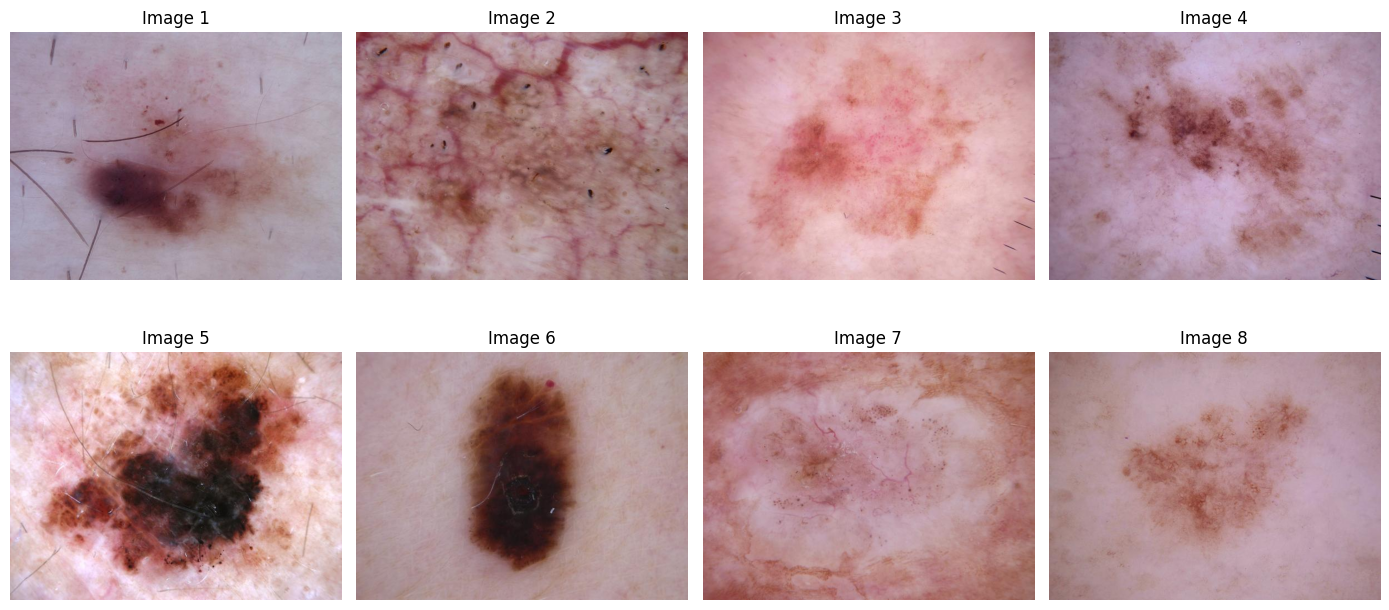


 Size of image:  (450, 600, 3)


In [7]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'/content/datasets/exp0/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader

The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. Its main purpose is to facilitate the efficient loading and manipulation of data during model training.



---
**Load Libraries for DataLoader**

---

In [8]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm # progress bar

>**Note**: These time magics (%time and %%time) will give you information about how long it takes to execute the code in the respective cell in Google Colab. The results will be displayed below the cell after the execution is completed.

---
**Create a Dataloader for train, val y test sets**

---

In [9]:
%%time

# 1. Calculate the mean and standard deviation on the training set.
# train, validation and test data directory

train_dir = "/content/datasets/exp0/train/"
val_dir  = "/content/datasets/exp0/test/"
test_dir   = "/content/datasets/exp0/val/"

# transform to calculate mean and standard desviation
transform = transforms.Compose([
    transforms.ToTensor()  # transform images to tensor
])

# Load the ImageFolder dataset and apply the transformation
dataset = datasets.ImageFolder(root= train_dir, transform=transform)

# it's better to use a loader to retrieve images (tensors)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables to store the sum of pixel values and
# standard deviation.
# These variables are set to floating-point zeros to ensure
# accurate calculations.
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

# Iterates over the data loader (loader),
# calculates the mean and standard deviation across all channels
# for each batch(0) and spatial dimensions (height(2) and width(3))
for images, _ in loader:
    mean_sum += torch.mean(images, dim=[0, 2, 3])
    std_sum += torch.std(images, dim=[0, 2, 3])
    total_samples += 1

mean = mean_sum / total_samples
std = std_sum / total_samples

print("Total train samples:", total_samples)
print("Mean:", mean)
print("Std:", std)

Total train samples: 2700
Mean: tensor([0.7513, 0.5535, 0.5788])
Std: tensor([0.0921, 0.1196, 0.1349])
CPU times: user 28.6 s, sys: 2.66 s, total: 31.3 s
Wall time: 33.2 s


---
**Normalize the dataloaders using Statistics**

---


In [10]:
%%time

# 2. Normalize the training set using these statistics.
train_set = datasets.ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

# 3. Normalize the test and validation set using the same statistics
# calculated on the training set.
val_set = datasets.ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

test_set = datasets.ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

print(f"Length of Train Data :{len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")

classes = train_set.classes
print('Classes: ', classes)

Length of Train Data :2700
Length of Validation Data : 600
Length of Test Data : 300
Classes:  ['class_0', 'class_1']
CPU times: user 8.75 ms, sys: 974 µs, total: 9.73 ms
Wall time: 9.69 ms



- **Normalization**: Normalization is crucial for ensuring that pixel values across images are on a similar scale, which helps in stabilizing and speeding up the training process of deep neural networks.  
- **Dataset Preparation**: Each dataset (`train_data`, `val_set`, `test_set`) is prepared with consistent transformations and normalization, facilitating uniformity in data processing across training, validation, and testing phases.

This setup ensures that the datasets are properly preprocessed and ready to be used in training and evaluating machine learning models, particularly deep neural networks, using PyTorch.

### Displaying all classes



---
**Display one example from each class**

---


CPU times: user 3.87 s, sys: 61.1 ms, total: 3.93 s
Wall time: 3.92 s


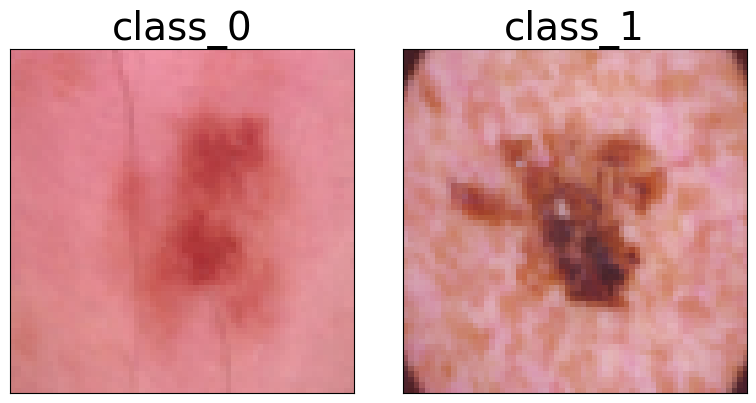

In [11]:
%%time
inv_normalize = transforms.Normalize(
  mean= [-m/s for m, s in zip(mean, std)],
  std= [1/s for s in std]
)

fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(2*4,1*4),
                       subplot_kw={'facecolor': "#ebf5ff"})

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[i], fontsize=28)
  img = next(img for img,label in train_set if label == i)
  #ax.imshow(img.permute(1,2,0)) # for normalized channels
  ax.imshow(inv_normalize(img).permute(1,2,0)) # for unnormalized

fig.tight_layout()



Let us show one example for each class, for fun. As we've transformed the image by normalizing it, we should undo the transformation before visualizing the image.



---
**Define a small function to determine the columns and rows needed for a given number of images**

---

In [12]:
# We define a small function to determine the columns and rows needed
# for a given number of images.
def rows_cols(input):

    divisors = []

    # Realize a little operation with input
    # in order to determine divisors for input
    for i in range(1, input+1): # not divide by 0
        if input % i == 0:
            divisors.append(i)

    # divisors list size
    n = len(divisors)

    # If the size is odd, the element in the middle is the median value.
    if n % 2 != 0:
        median_index = (n - 1) // 2
        rows = divisors[median_index]
    # If the size is even, the two elements in the middle are equal
    else:
        median_index1 = n // 2 - 1
        rows = divisors[median_index1]

    cols = int(input/rows)
    return rows, cols




We define a function to obtain `ncols` and `nrows` need for a given number of images in order to display them.



---
**Define batch_size, epochs and obtain the number of classes**

---


In [13]:
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 20
# num_classes define the number of the class
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")

Number of Classes: 2



We will **run only 20 epochs** to check early stopping functionality. Later, we will load this model and add 10 epochs more in order to resume the trainning.

----
**Define the train and test loaders for the training loop**

---

In [14]:
# Create dataloaders object for training/val loop.

train_dataloader = DataLoader(
  train_set,
  batch_size=batch_size,
  shuffle=True,
  num_workers=2)

val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)

To see how the DataLoader works and how it handles the loaded data, we select a random batch and display it, indicating its class label as well. It is said, we can display all images and its ground truth from a random batch in a easy way with dataloaders.



---
**Display all images and its ground truth from a random batch**

---

CPU times: user 965 ms, sys: 283 ms, total: 1.25 s
Wall time: 3.71 s


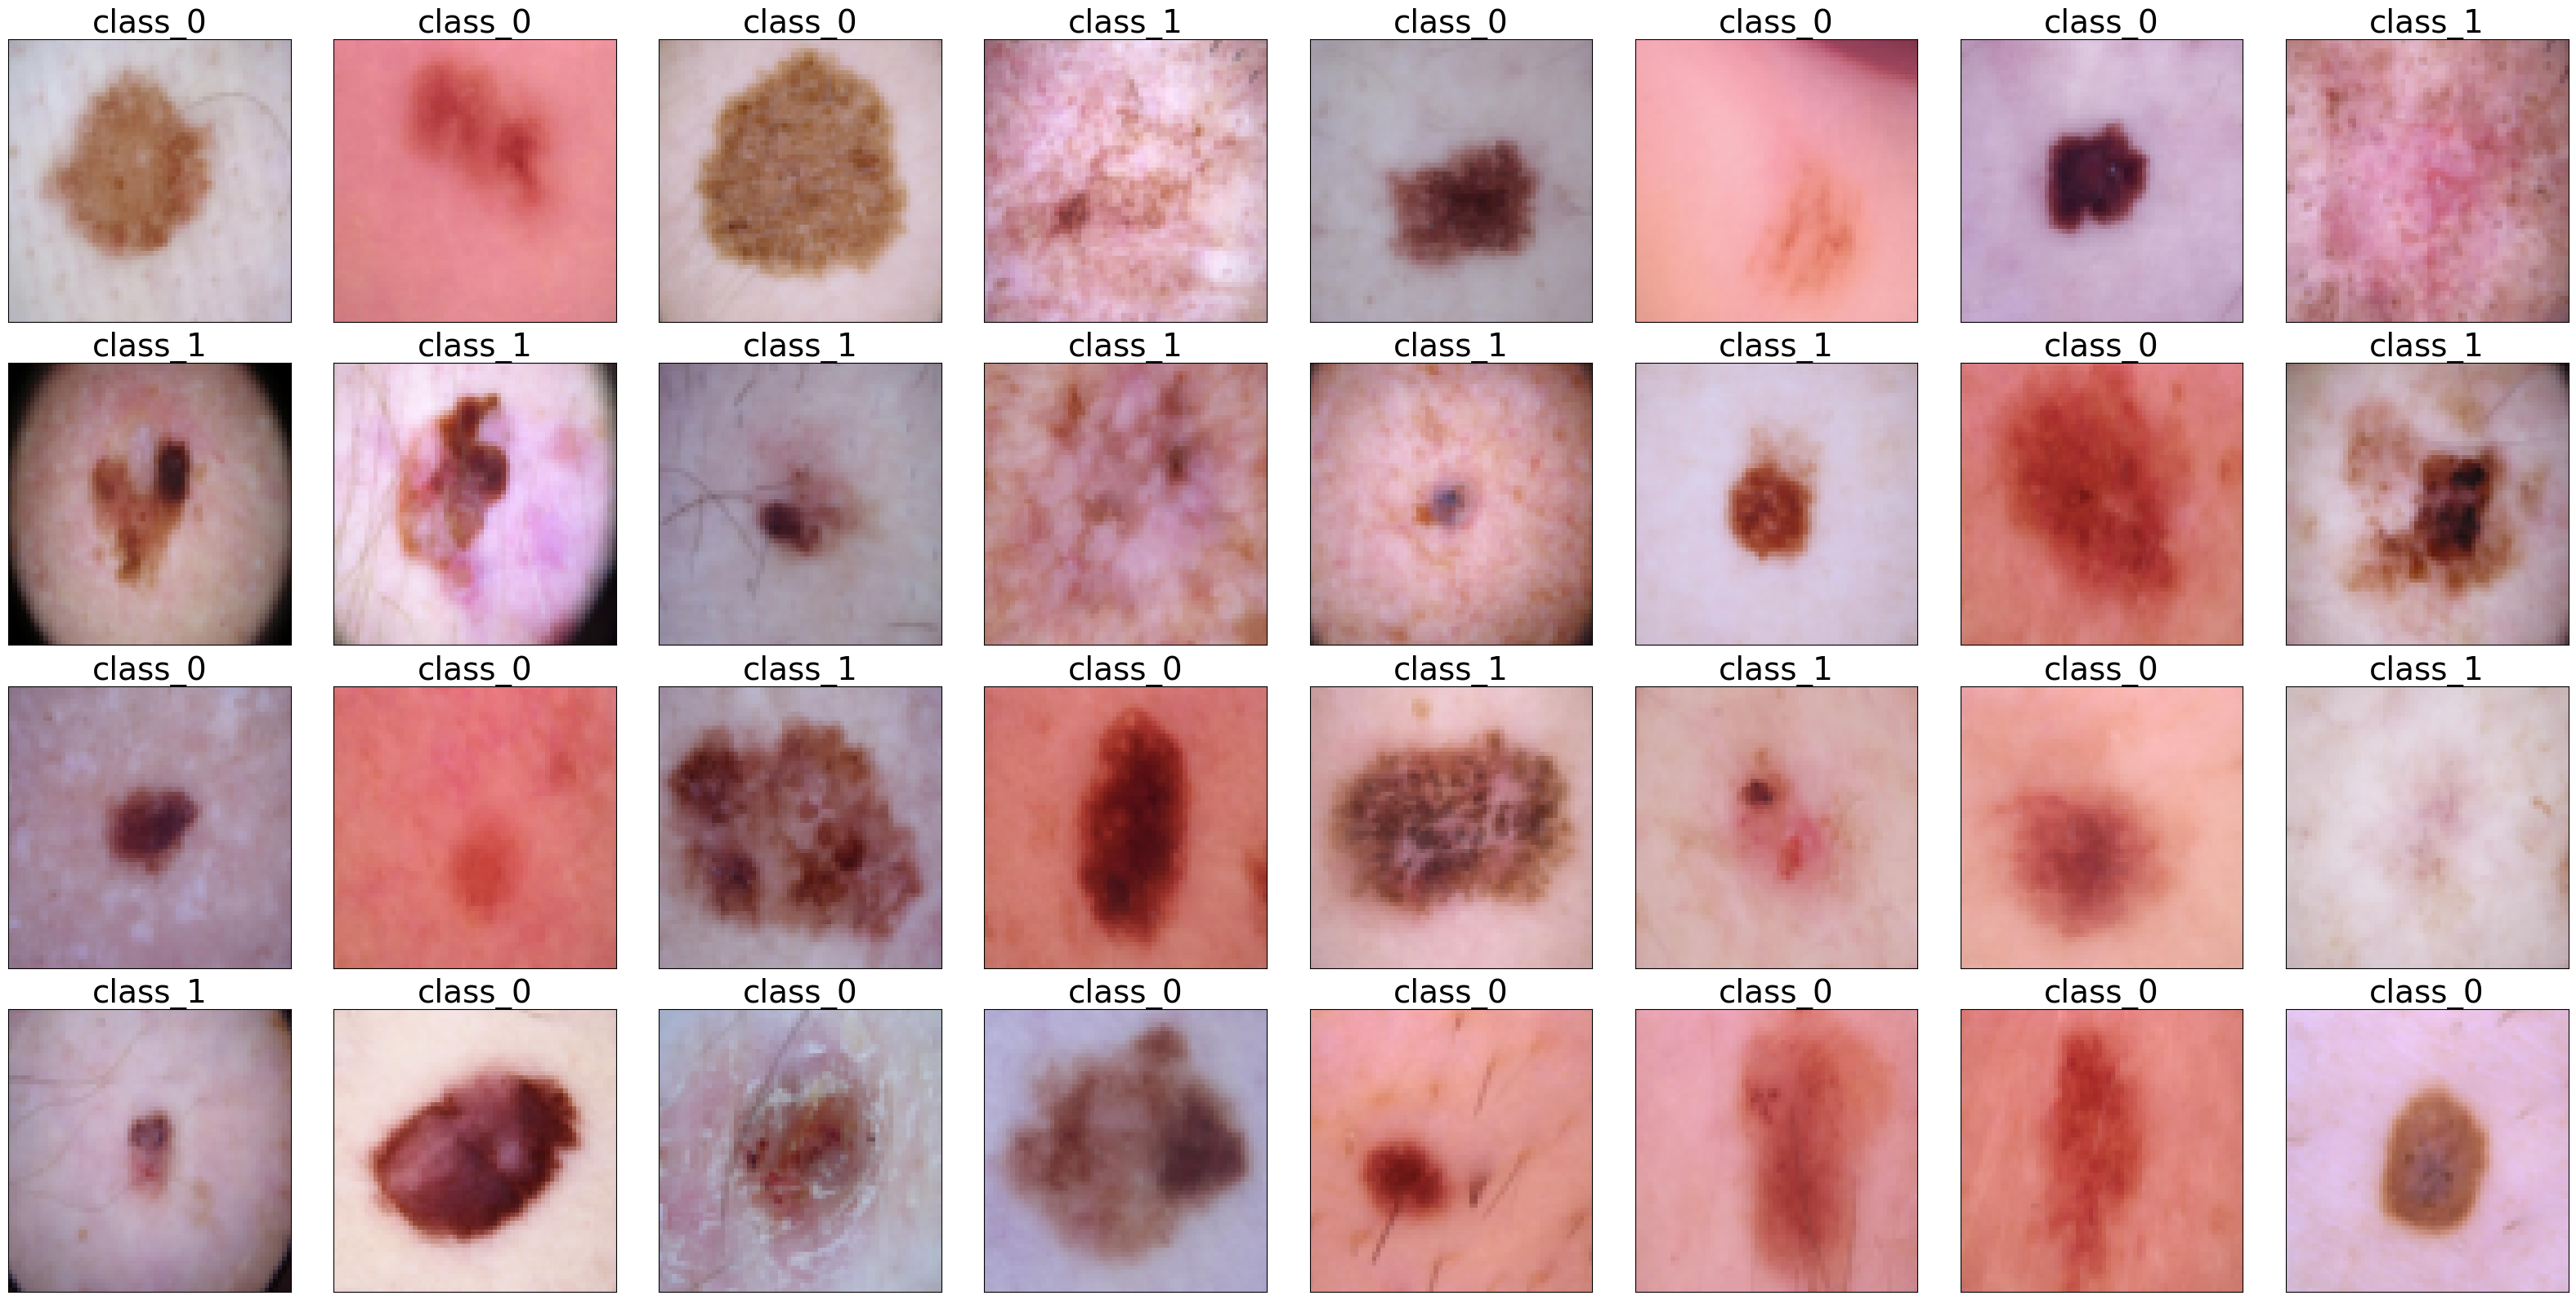

In [15]:
%%time

import itertools
import numpy as np
import os

nrows,ncols = rows_cols(batch_size)

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*4,nrows*4),
                       subplot_kw={'facecolor': "#ebf5ff"})
rb_index = np.random.randint(0, len(train_dataloader))

# Get the batch corresponding to the random index
imgs, labels = next(itertools.islice(train_dataloader, rb_index, rb_index+1))

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[labels[i]], fontsize=28)
  #ax.imshow(imgs[i].permute(1,2,0)) # for unnormalized
  ax.imshow(inv_normalize(imgs[i]).permute(1,2,0)) # for unnormalized

fig.tight_layout()




## 3. Define a [Convolutional Neural Network](https://pytorch.org/docs/stable/nn.html)

---
**import Libraries**

---


In [16]:
import torch.nn as nn
import torch.nn.functional as F

---
**Define the Model**

---


In [17]:
# Large Model
class myCNN(nn.Module):
    def __init__(self): # defines the constructor method __init__()
                        # for the myCNN class. This method is called
                        # when an instance of the class is created.
        super().__init__() # calls the constructor of the parent class
                           # (nn.Module) using Python's super() function.
                           # It initializes the parent class, allowing the
                           # myCNN class to inherit functionality from nn.Module.

        self.network = nn.Sequential(

            # Layer 1: Conv2d
            # Input: (batch_size, 3, 64, 64)
            # Output: (batch_size, 32, 64, 64)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer 2: Conv2d
            # Input: (batch_size, 32, 64, 64)
            # Output: (batch_size, 64, 64, 64)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 3: MaxPool2d
            # Input: (batch_size, 64, 64, 64)
            # Output: (batch_size, 64, 32, 32)
            nn.MaxPool2d(2, 2),

            # Layer 4: Conv2d
            # Input: (batch_size, 64, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 5: Conv2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 6: MaxPool2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 16, 16)
            nn.MaxPool2d(2, 2),

            # Layer 7: Conv2d
            # Input: (batch_size, 128, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 8: Conv2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 9: MaxPool2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 8, 8)
            nn.MaxPool2d(2, 2),

            # Layer 10: Flatten
            # Input: (batch_size, 256, 8, 8)
            # Output: (batch_size, 16384)
            nn.Flatten(),

            # Layer 11: Linear
            # Input: (batch_size, 16384)
            # Output: (batch_size, 128)
            nn.Linear(16384, 128),
            nn.ReLU(),

            # Layer 12: Linear
            # Input: (batch_size, 128)
            # Output: (batch_size, 64)
            nn.Linear(128, 64),
            nn.ReLU(),

            # Layer 13: Linear
            # Input: (batch_size, 64)
            # Output: (batch_size, 2)
            nn.Linear(64, 2)
        )
    # The forward method takes a single argument xb,
    # which represents the input data to the neural network.
    # Inside the forward method, the input xb is passed through the
    # neural network layers defined in self.network. The result of this
    # computation is then returned as the output of the forward method.
    def forward(self, xb):
        return self.network(xb)

### Setting the Computing Device



---
**Setting CUDA environment**

---

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


model = myCNN().to(device)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

print(model)

Using cuda device
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): ReLU()
    (18): Linear



---
**Display the summary of our model**

---

In [19]:
!pip install torchsummary -q

from torchsummary import summary

summary(model, (3,64,64)) # input = [3,64,64]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
              ReLU-2           [-1, 32, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          18,496
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]         147,584
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         295,168
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
             ReLU-14          [-1, 256,

#### Define a Loss function and optimizer



---

**Define a Loss Function and a Optimizer**

---


In [20]:
import torch

criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.001 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 4. Train the network

### Defining Training Loop


---
**Defining train**

---

In [21]:
def train(dataloader, model, criterion, optimizer):
  running_loss, corrects, current = 0, 0, 0
  size = len(dataloader.dataset) # number images from dataset
  print(f"Training:")
  model.train() #training mode on
  loop = tqdm(train_dataloader) # Initialize a progress bar
  for batch, (X, y) in enumerate(loop):
    # take data (X) and label (y) from a batch
    X, y = X.to(device), y.to(device) # Move the data and labels
                                      # to the device (CPU or GPU)

    # forward pass
    preds = model(X) # Compute predictions
    loss = criterion(preds, y) # Compute the loss between predictions and labels

    # backpropagation
    optimizer.zero_grad()   # zero the gradient buffers
    loss.backward()         # compute gradients to backwards
    optimizer.step()        # Does the "update weights" of model

    # Calculate Output Metrics training_loss, training_accuracy

    # 1. loss.item() contains the loss of entire mini-batch converted to scalar
    running_loss += loss.item() # Accumulate the loss for this batch

    # 2. current image (last image in the batch) for progressive bar
    current += len(X) # Update the current number of processed images

    # 3. From the predictions, I select the index (class) of the one with
    # the highest value and compare it with the label (class). The boolean value
    # is converted into a float (true becomes 1, false becomes 0), and all are
    # summed up. Finally, 'item' converts them into a scalar value.
    # This way, 'corrects' reflects the number of correct predictions (accuracy)
    corrects += (preds.argmax(1) == y).type(torch.float).sum().item()

    # 4. running loss is the sum of our loss. Training loss is a running average
    # through batches
    training_loss = running_loss/(batch+1)

    # 5. Training accuracy = number of corrects predictions/number of processed images
    training_accuracy = corrects/current

    # Update the progress bar with current epoch, batch, and metrics
    loop.set_description(f'[{epoch + 1}/{epochs} epochs, {current:>5d}/{len(train_dataloader.dataset):>5d} data]')
    loop.set_postfix(Training_Loss=training_loss, Accuracy=f'{100*corrects/current:>0.1f}%')

  return training_loss, training_accuracy

---
**Defining val**

---

In [22]:
def val(dataloader, model, criterion):
  size = len(dataloader.dataset) # number images from dataset to evaluate
  num_batches = len(dataloader)  # number of batches

  # Evaluation (test)) Mode
  model.eval()

  val_loss, corrects = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # prediction for a dataset not used in training
      # compute prediction error and number of corrects
      # through batches
      preds = model(X)
      val_loss += criterion(preds, y).item()
      corrects += (preds.argmax(1) == y).type(torch.float).sum().item()
  val_loss /= num_batches
  corrects /= size
  print(f"Val: \n Accuracy: {(100*corrects):>0.1f}%, val_Loss: {val_loss:>8f} \n")

  return val_loss, corrects

Later, we will define the training loop.


### Early Stopping

Early stopping is a technique used in machine learning model training to halt training before the model begins to overfit the training data. This is done by monitoring a metric of interest on the validation set and stopping training when the metric ceases to improve for a certain number of consecutive epochs.

You can use the Python standard library os to create a directory named `"train"` in the current directory and then save the trained models (pth) in that directory. Here's an example of how to do it:


To create directories named `train1`, `train2`, etc., each time you execute a training loop, you can modify the code to check the number of existing training directories and then create the next directory in sequence. Here's an example of how you could do this:

---
**Create Train directories**

---

In [23]:
import os
import torchvision.models as models

def create_train_dir():
  """
  Creates a directory named train within the current directory.
  """
  # Current directory
  current_dir = os.getcwd()
  print(current_dir)

  # Base path to the "train" directory
  base_train_dir = os.path.join(current_dir, 'train')

  # Determine the next training directory name
  train_dirs = [d for d in os.listdir(current_dir) if d.startswith('train') and d[5:].isdigit()]
  train_dirs.sort(key=lambda x: int(x[5:]) if x[5:].isdigit() else -1)
  next_train_num = 1 if not train_dirs else int(train_dirs[-1][5:]) + 1
  train_dir = os.path.join(current_dir, f'train{next_train_num}')

  # Create the next training directory
  os.makedirs(train_dir, exist_ok=True)
  print(f"Training directory: {train_dir}")
  return train_dir

##5. [Checkpoints and Early Stopping](https://machinelearningmastery.com/managing-a-pytorch-training-process-with-checkpoints-and-early-stopping/)

Application checkpointing is a **fault tolerance technique**. In this approach, a *snapshot of the state of the system is taken in case of system failure*. If there is a problem, you can resume from the snapshot. The checkpoint may be used directly or as the starting point for a new run, picking up where it left off. When training deep learning models, the checkpoint captures the weights of the model. These weights can be used to make predictions as-is or as the basis for ongoing training.

PyTorch does not provide any function for checkpointing but it has functions for retrieving and restoring weights of a model. So you can implement checkpointing logic with them. Let’s make a checkpoint and a resume function, which simply save weights from a model and load them back:


Sometimes, there are states outside of the model and you may want to checkpoint it as well. One particular example is the optimizer, which in cases like SDG or Adam, there are dynamically adjusted momentum. If you restarted your training loop, you may want to restore the momentum at the optimizer as well. It is not difficult to do. The idea is to make your `checkpoint()` function more complicated thanks to `torch.save()` and `torch.load()` function are backed by `pickle`, so you can use it with a list or dict container.



---
**Checkpoint and resume function**

---

In [24]:
import csv

def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
    }, filename)
    with open(f'{filename}.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy'])
      for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_val_history, accuracy_val_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, val_loss, val_accuracy])


def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])



---
**Defining a resume training loop**

---


In [25]:
loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []


start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"myCNN-resume-{resume_epoch}.pth"))

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir,f"myCNN-resume-{epoch+1}.pth"))
print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train1
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:17<00:00,  4.92it/s, Accuracy=50.0%, Training_Loss=0.694]


Val: 
 Accuracy: 50.0%, val_Loss: 0.693200 

Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:18<00:00,  4.52it/s, Accuracy=50.0%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692934 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.23it/s, Accuracy=50.0%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692844 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.29it/s, Accuracy=50.0%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692777 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.23it/s, Accuracy=50.0%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692698 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.02it/s, Accuracy=52.8%, Training_Loss=0.693]


Val: 
 Accuracy: 50.2%, val_Loss: 0.692629 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.90it/s, Accuracy=52.4%, Training_Loss=0.693]


Val: 
 Accuracy: 50.0%, val_Loss: 0.692489 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.03it/s, Accuracy=62.3%, Training_Loss=0.693]


Val: 
 Accuracy: 69.0%, val_Loss: 0.692340 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.12it/s, Accuracy=57.2%, Training_Loss=0.692]


Val: 
 Accuracy: 69.5%, val_Loss: 0.692157 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.08it/s, Accuracy=64.2%, Training_Loss=0.692]


Val: 
 Accuracy: 70.8%, val_Loss: 0.691875 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.90it/s, Accuracy=58.0%, Training_Loss=0.692]


Val: 
 Accuracy: 70.7%, val_Loss: 0.691506 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.33it/s, Accuracy=69.5%, Training_Loss=0.691]


Val: 
 Accuracy: 71.0%, val_Loss: 0.690998 

Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.97it/s, Accuracy=68.6%, Training_Loss=0.691]


Val: 
 Accuracy: 69.8%, val_Loss: 0.690249 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.13it/s, Accuracy=65.9%, Training_Loss=0.69]


Val: 
 Accuracy: 71.0%, val_Loss: 0.689051 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.91it/s, Accuracy=68.8%, Training_Loss=0.689]


Val: 
 Accuracy: 69.2%, val_Loss: 0.686976 

Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.65it/s, Accuracy=66.9%, Training_Loss=0.686]


Val: 
 Accuracy: 69.5%, val_Loss: 0.683238 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.41it/s, Accuracy=69.4%, Training_Loss=0.68]


Val: 
 Accuracy: 71.2%, val_Loss: 0.675833 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.01it/s, Accuracy=70.7%, Training_Loss=0.67]


Val: 
 Accuracy: 70.8%, val_Loss: 0.660350 

Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.57it/s, Accuracy=69.7%, Training_Loss=0.644]


Val: 
 Accuracy: 71.7%, val_Loss: 0.616202 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.94it/s, Accuracy=70.1%, Training_Loss=0.583]


Val: 
 Accuracy: 71.7%, val_Loss: 0.552369 

Done!. Finished Training


---
**Displaying the metrics curves model**

---

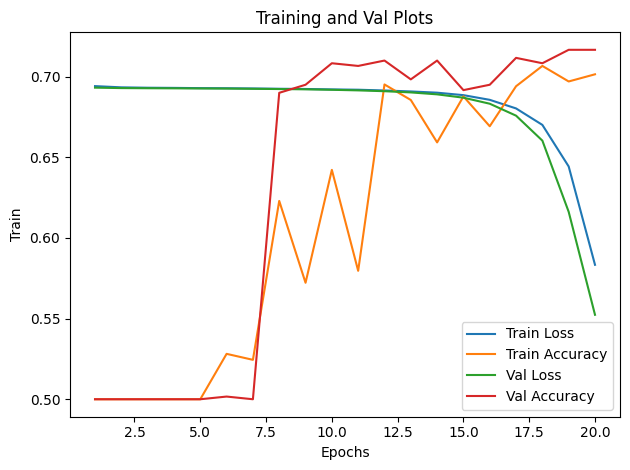

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(accuracy_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_val_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(accuracy_val_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

Checkpointing is not only for fault tolerance. You can also use it to keep your best model. How to define what is the best is `subjective` but considering the score from the test set is a sensible method. Let’s say to keep only the best model ever found.

The variable `best_accuracy` is to keep track on the highest validation accuracy (`val_acc`) obtained so far, which is in a percentage range of 0 to 100. Whenever a higher accuracy is observed, the model is checkpointed to the file `best_model.pth`. The best model is restored after the entire training loop, via the `resume()` function which was created before.

Afterward, you can make predictions with the model on unseen data. Beware that, if you’re using a different metric for checkpointing, e.g., the cross entropy loss, the better model should come with a lower cross entropy. Thus you should keep track on the lowest cross entropy obtained.


---
**Load the last resume model saved**

---

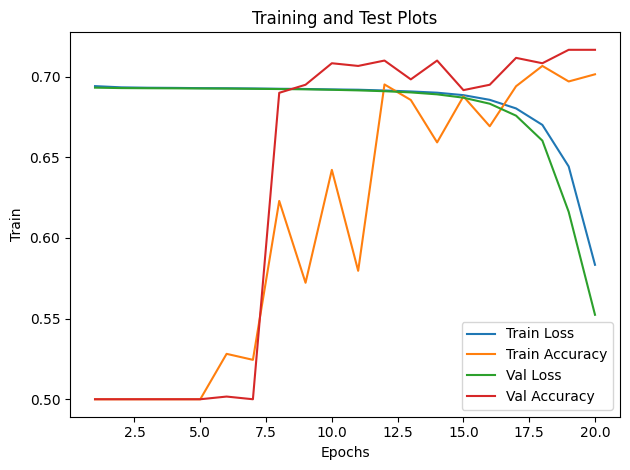

In [27]:
epochs = []
loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

with open(train_dir+'/myCNN-resume-20.pth.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        epochs.append(int(row['Epoch']))
        loss_train_history.append(float(row['Train Loss']))
        accuracy_train_history.append(float(row['Train Accuracy']))
        loss_val_history.append(float(row['Val Loss']))
        accuracy_val_history.append(float(row['Val Accuracy']))
    epochs=len(epochs)

fig, ax = plt.subplots()

ax.set_title('Training and Test Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(accuracy_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_val_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(accuracy_val_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

---
**Train 10 more epochs**

---

In [28]:
print(len(loss_train_history))

20


In [29]:
# how many epochs more?
epochs = 10

start_epoch = len(loss_train_history)+1
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"myCNN-resume-{resume_epoch}.pth"))

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(start_epoch-1, start_epoch -1 + epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir,f"myCNN-resume-{epoch+1}.pth"))
print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train2
Training:


[21/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.27it/s, Accuracy=71.3%, Training_Loss=0.548]


Val: 
 Accuracy: 72.7%, val_Loss: 0.543771 

Training:


[22/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.10it/s, Accuracy=71.8%, Training_Loss=0.539]


Val: 
 Accuracy: 72.0%, val_Loss: 0.536158 

Training:


[23/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.28it/s, Accuracy=71.4%, Training_Loss=0.535]


Val: 
 Accuracy: 72.2%, val_Loss: 0.531979 

Training:


[24/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.98it/s, Accuracy=71.8%, Training_Loss=0.532]


Val: 
 Accuracy: 72.3%, val_Loss: 0.527773 

Training:


[25/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.06it/s, Accuracy=72.0%, Training_Loss=0.521]


Val: 
 Accuracy: 73.5%, val_Loss: 0.524344 

Training:


[26/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.11it/s, Accuracy=71.9%, Training_Loss=0.528]


Val: 
 Accuracy: 72.2%, val_Loss: 0.527756 

Training:


[27/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.81it/s, Accuracy=72.6%, Training_Loss=0.524]


Val: 
 Accuracy: 73.3%, val_Loss: 0.519045 

Training:


[28/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.19it/s, Accuracy=72.8%, Training_Loss=0.518]


Val: 
 Accuracy: 74.2%, val_Loss: 0.508997 

Training:


[29/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.15it/s, Accuracy=73.2%, Training_Loss=0.512]


Val: 
 Accuracy: 73.0%, val_Loss: 0.510916 

Training:


[30/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.17it/s, Accuracy=72.9%, Training_Loss=0.506]


Val: 
 Accuracy: 74.2%, val_Loss: 0.504994 

Done!. Finished Training


---
**Display metrics with 10 epochs more**

---


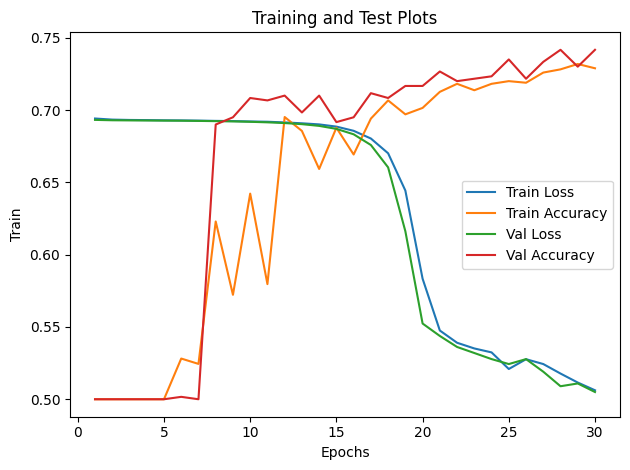

In [30]:
fig, ax = plt.subplots()

ax.set_title('Training and Test Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(accuracy_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_val_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(accuracy_val_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

---
**Train with 20 epochs more**

---

In [31]:
# how many epochs more?
epochs = 20

start_epoch = len(loss_train_history)+1
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir+f"/myCNN-resume-{resume_epoch}.pth"))

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(start_epoch-1, start_epoch -1 + epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir,f"myCNN-resume-{epoch+1}.pth"))
print("Done!. Finished Training")

/content/datasets
Training directory: /content/datasets/train3
Training:


[31/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.69it/s, Accuracy=73.2%, Training_Loss=0.506]


Val: 
 Accuracy: 73.5%, val_Loss: 0.498835 

Training:


[32/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.06it/s, Accuracy=73.4%, Training_Loss=0.503]


Val: 
 Accuracy: 73.2%, val_Loss: 0.525950 

Training:


[33/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.54it/s, Accuracy=73.9%, Training_Loss=0.503]


Val: 
 Accuracy: 74.0%, val_Loss: 0.494596 

Training:


[34/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.10it/s, Accuracy=74.3%, Training_Loss=0.495]


Val: 
 Accuracy: 74.7%, val_Loss: 0.485484 

Training:


[35/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.71it/s, Accuracy=74.3%, Training_Loss=0.492]


Val: 
 Accuracy: 74.0%, val_Loss: 0.488813 

Training:


[36/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.80it/s, Accuracy=73.9%, Training_Loss=0.494]


Val: 
 Accuracy: 74.2%, val_Loss: 0.483155 

Training:


[37/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.19it/s, Accuracy=75.1%, Training_Loss=0.49]


Val: 
 Accuracy: 74.3%, val_Loss: 0.488664 

Training:


[38/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.81it/s, Accuracy=74.1%, Training_Loss=0.486]


Val: 
 Accuracy: 75.2%, val_Loss: 0.486371 

Training:


[39/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.19it/s, Accuracy=75.0%, Training_Loss=0.48]


Val: 
 Accuracy: 76.0%, val_Loss: 0.482336 

Training:


[40/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.71it/s, Accuracy=75.3%, Training_Loss=0.481]


Val: 
 Accuracy: 74.3%, val_Loss: 0.486016 

Training:


[41/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.71it/s, Accuracy=75.0%, Training_Loss=0.482]


Val: 
 Accuracy: 74.2%, val_Loss: 0.500427 

Training:


[42/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.10it/s, Accuracy=75.3%, Training_Loss=0.475]


Val: 
 Accuracy: 73.7%, val_Loss: 0.472905 

Training:


[43/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.01it/s, Accuracy=75.9%, Training_Loss=0.476]


Val: 
 Accuracy: 74.0%, val_Loss: 0.475060 

Training:


[44/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.40it/s, Accuracy=75.3%, Training_Loss=0.481]


Val: 
 Accuracy: 74.5%, val_Loss: 0.473967 

Training:


[45/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.57it/s, Accuracy=74.5%, Training_Loss=0.482]


Val: 
 Accuracy: 76.2%, val_Loss: 0.495090 

Training:


[46/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.06it/s, Accuracy=75.1%, Training_Loss=0.475]


Val: 
 Accuracy: 73.2%, val_Loss: 0.500407 

Training:


[47/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.25it/s, Accuracy=75.6%, Training_Loss=0.469]


Val: 
 Accuracy: 75.2%, val_Loss: 0.461894 

Training:


[48/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.98it/s, Accuracy=76.0%, Training_Loss=0.463]


Val: 
 Accuracy: 75.5%, val_Loss: 0.472091 

Training:


[49/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.98it/s, Accuracy=75.7%, Training_Loss=0.468]


Val: 
 Accuracy: 73.8%, val_Loss: 0.490193 

Training:


[50/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.96it/s, Accuracy=75.3%, Training_Loss=0.469]


Val: 
 Accuracy: 75.7%, val_Loss: 0.467223 

Done!. Finished Training


---
**Display metrics with 20 epochs more**

---

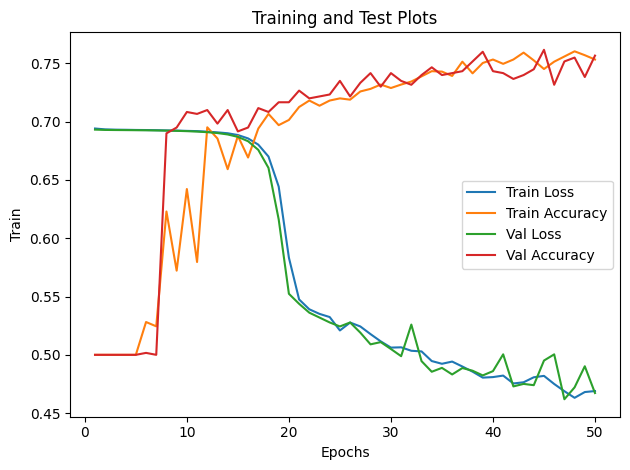

In [32]:
fig, ax = plt.subplots()

ax.set_title('Training and Test Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(accuracy_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_val_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(accuracy_val_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

## 5. **Defining Early Stopping with best model**

The training loop can be modified as follows: Keep track of the best model based on the validation metric. If the current model is better than the previously saved best model, update the best model.

---
**Best Model**

---

In [33]:
best_accuracy = -1
epochs=20

start_epoch = len(loss_train_history)+1
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"myCNN-resume-{resume_epoch}.pth"))

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(start_epoch-1, start_epoch -1 + epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    checkpoint(model, os.path.join(train_dir,f"myCNN-resume-{epoch+1}.pth"))
    print(f'best model in epoch:{epoch+1}')
# save the last epoch in order to continue with training
checkpoint(model, os.path.join(train_dir,f"myCNN-resume-{epoch+1}.pth"))
print("Done!. Finished Training")


/content/datasets
Training directory: /content/datasets/train4
Training:


[51/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.05it/s, Accuracy=76.0%, Training_Loss=0.458]


Val: 
 Accuracy: 77.3%, val_Loss: 0.457155 

best model in epoch:51
Training:


[52/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.21it/s, Accuracy=76.1%, Training_Loss=0.462]


Val: 
 Accuracy: 74.7%, val_Loss: 0.459090 

Training:


[53/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.31it/s, Accuracy=75.1%, Training_Loss=0.47]


Val: 
 Accuracy: 77.3%, val_Loss: 0.475577 

Training:


[54/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.24it/s, Accuracy=76.2%, Training_Loss=0.456]


Val: 
 Accuracy: 75.3%, val_Loss: 0.493318 

Training:


[55/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.89it/s, Accuracy=76.9%, Training_Loss=0.454]


Val: 
 Accuracy: 76.8%, val_Loss: 0.452838 

Training:


[56/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.89it/s, Accuracy=76.8%, Training_Loss=0.446]


Val: 
 Accuracy: 77.3%, val_Loss: 0.464902 

Training:


[57/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.37it/s, Accuracy=77.0%, Training_Loss=0.449]


Val: 
 Accuracy: 75.8%, val_Loss: 0.466665 

Training:


[58/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.09it/s, Accuracy=76.3%, Training_Loss=0.45]


Val: 
 Accuracy: 75.8%, val_Loss: 0.456591 

Training:


[59/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.72it/s, Accuracy=76.6%, Training_Loss=0.446]


Val: 
 Accuracy: 74.7%, val_Loss: 0.465046 

Training:


[60/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.68it/s, Accuracy=76.3%, Training_Loss=0.443]


Val: 
 Accuracy: 78.0%, val_Loss: 0.458720 

best model in epoch:60
Training:


[61/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.30it/s, Accuracy=77.7%, Training_Loss=0.448]


Val: 
 Accuracy: 75.7%, val_Loss: 0.454673 

Training:


[62/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.26it/s, Accuracy=77.7%, Training_Loss=0.444]


Val: 
 Accuracy: 77.5%, val_Loss: 0.448070 

Training:


[63/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.22it/s, Accuracy=78.2%, Training_Loss=0.436]


Val: 
 Accuracy: 77.8%, val_Loss: 0.461571 

Training:


[64/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.52it/s, Accuracy=78.0%, Training_Loss=0.44]


Val: 
 Accuracy: 77.2%, val_Loss: 0.456854 

Training:


[65/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.01it/s, Accuracy=77.5%, Training_Loss=0.443]


Val: 
 Accuracy: 78.7%, val_Loss: 0.453287 

best model in epoch:65
Training:


[66/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.85it/s, Accuracy=78.0%, Training_Loss=0.437]


Val: 
 Accuracy: 76.3%, val_Loss: 0.460324 

Training:


[67/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.91it/s, Accuracy=78.6%, Training_Loss=0.438]


Val: 
 Accuracy: 79.0%, val_Loss: 0.446573 

best model in epoch:67
Training:


[68/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.04it/s, Accuracy=77.4%, Training_Loss=0.433]


Val: 
 Accuracy: 77.5%, val_Loss: 0.464254 

Training:


[69/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.02it/s, Accuracy=78.3%, Training_Loss=0.43]


Val: 
 Accuracy: 76.8%, val_Loss: 0.454982 

Training:


[70/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.92it/s, Accuracy=78.6%, Training_Loss=0.43]


Val: 
 Accuracy: 77.5%, val_Loss: 0.454662 

Done!. Finished Training


---
**Displaying the metrics curves model (20 last epochs)**

---

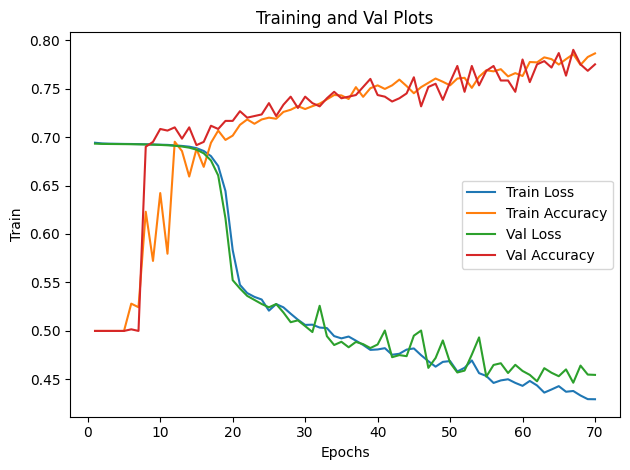

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(accuracy_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_val_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(accuracy_val_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

You can also checkpoint the model per epoch unconditionally together with the best model checkpointing, as you are free to create multiple checkpoint files. Since the code above is the find the best model and make a copy of it, you may usually see a further optimization to the training loop by stopping it early if the hope to see model improvement is slim. This is the early stopping technique that can save time in training.

The code above validates the model with test set at the end of each epoch and keeps the best model found into a checkpoint file. The simplest strategy for early stopping is to set up a threshold of
 epochs. If you didn’t see the model improved over the last
 epochs, you terminate the training loop in the middle. This can be implemented as follows:

 ---
 **Best Model and Early Stopping**

 ---

In [35]:
import torch

epochs=20

early_stop_thresh = 7
best_accuracy = -1
best_epoch = -1


start_epoch = len(loss_train_history)+1 # the last .pth saved.
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"myCNN-resume-{resume_epoch}.pth"))

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(start_epoch-1, start_epoch -1 + epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, os.path.join(train_dir,"best_model.pth"))
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")


/content/datasets
Training directory: /content/datasets/train5
Training:


[71/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.01it/s, Accuracy=78.1%, Training_Loss=0.436]


Val: 
 Accuracy: 76.3%, val_Loss: 0.474412 

best model in epoch=71 with Accuracy=76.3%
Training:


[72/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.12it/s, Accuracy=77.9%, Training_Loss=0.431]


Val: 
 Accuracy: 78.0%, val_Loss: 0.461111 

best model in epoch=72 with Accuracy=78.0%
Training:


[73/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.28it/s, Accuracy=78.6%, Training_Loss=0.424]


Val: 
 Accuracy: 79.0%, val_Loss: 0.439217 

best model in epoch=73 with Accuracy=79.0%
Training:


[74/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.91it/s, Accuracy=78.8%, Training_Loss=0.427]


Val: 
 Accuracy: 76.8%, val_Loss: 0.448009 

Training:


[75/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.03it/s, Accuracy=78.0%, Training_Loss=0.436]


Val: 
 Accuracy: 77.2%, val_Loss: 0.456161 

Training:


[76/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.70it/s, Accuracy=78.9%, Training_Loss=0.422]


Val: 
 Accuracy: 78.2%, val_Loss: 0.455840 

Training:


[77/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.25it/s, Accuracy=79.0%, Training_Loss=0.419]


Val: 
 Accuracy: 78.7%, val_Loss: 0.441145 

Training:


[78/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.16it/s, Accuracy=79.6%, Training_Loss=0.412]


Val: 
 Accuracy: 77.7%, val_Loss: 0.445086 

Training:


[79/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.36it/s, Accuracy=79.7%, Training_Loss=0.414]


Val: 
 Accuracy: 78.8%, val_Loss: 0.441374 

Training:


[80/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.95it/s, Accuracy=80.3%, Training_Loss=0.406]


Val: 
 Accuracy: 73.8%, val_Loss: 0.507291 

Training:


[81/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.45it/s, Accuracy=79.4%, Training_Loss=0.419]


Val: 
 Accuracy: 77.5%, val_Loss: 0.460106 

Early stopped training at epoch 81 due to 7 epochs whitout enhacement
Done!. Finished Training


---
**Displaying the metrics curves model (only 20 last epochs)**

---

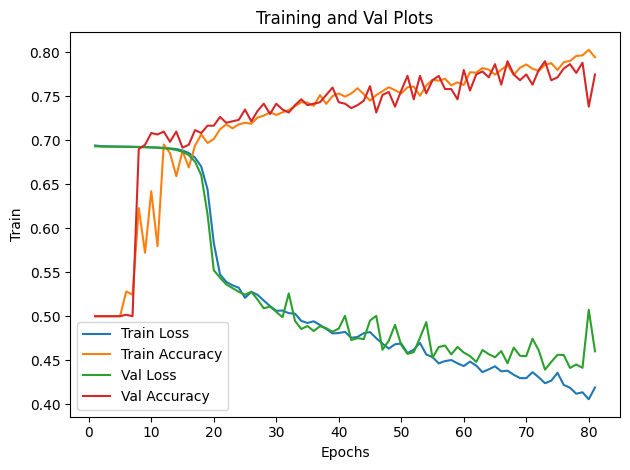

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(accuracy_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_val_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(accuracy_val_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

## 6. **Validating our model**


---
**Validation Metrics**

---

In [37]:
# Suppose you have your model trained and the datasets split up.
val_dataloader = DataLoader(
  val_set, # or test_set
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)


import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

# Define a function to obtain the model predictions.
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # If you are using GPU, move the data to the GPU.
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Defines the device (CPU or GPU) on which the operations are to be performed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load saved model
model_file = os.path.join(train_dir,f"best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Supongamos que 'val_dataloader' es tu DataLoader de validación

# Define and load the model
# Make sure you define your model properly
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Get model predictions and true labels from the validation set.
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Extract the values of the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("Verdaderos negativos (TN):", tn)
print("Falsos positivos (FP):", fp)
print("Falsos negativos (FN):", fn)
print("Verdaderos positivos (TP):", tp)


Verdaderos negativos (TN): 221
Falsos positivos (FP): 79
Falsos negativos (FN): 47
Verdaderos positivos (TP): 253


---
**Get confusion metrics**

---

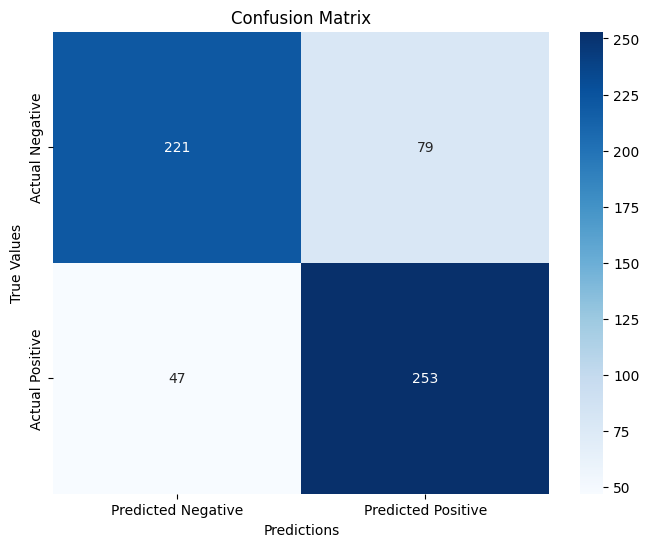

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'etiquetas_val' are the true labels and 'predicciones_val' are the model predictions

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()

---

**Display a ROC curve**

---


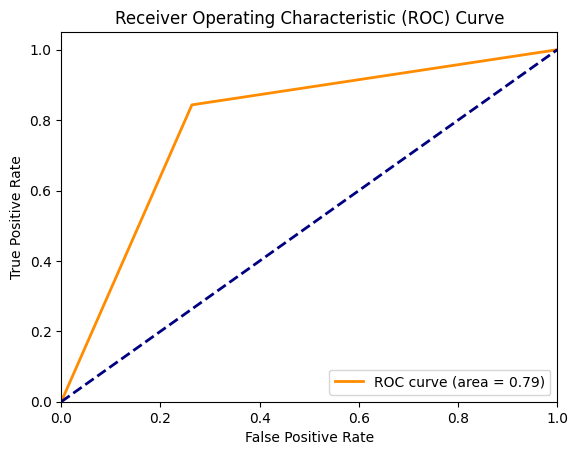

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Supongamos que 'predicciones_val' y 'etiquetas_val' son las predicciones y etiquetas verdaderas del conjunto de validación
# Obtenidas previamente usando la función obtener_predicciones()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(etiquetas_val, predicciones_val)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


---
**Download the file to your local machine**

---

In [40]:
from google.colab import files

files.download(os.path.join(train_dir,f"best_model.pth.csv"))
files.download(os.path.join(train_dir,f"best_model.pth"))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `NOTEBOOK PRACTICE 8`

---
You must implement an best model with Early stopping for this NB8.

---

### Instructions to Improve the Notebook (study and work about it by yourself):

ChatGPT can be your great allied. Use it for your convenence.


1. You can use different criterions and optimizers.

2. You must use another 'MyCNN'.

3. Don't use data augmentation.

4. We will use data augmentatiuon in the next notebook.

5. Implement 'early stopping with best model'. previous 'early stoppings' or 'best model' is not necessary.

Other things to practice:

1. **Training and Val plots**:
  .  
  - Monitor the training progress using validation data to avoid overfitting.
  - Visualize the model's performance using appropriate plots and metrics.
  
2. **Confussion Matrix**
  - Obtain a Confussion Matrix and explain the result:

3. **Calculate accuracy_score, precision_score, recall_score, f1_score**
  - Analize these metrics and explain the result

4. **Classification Report**
  - Analize the classification report

6. **Roc Curve**:
  - Obtain and analize a Roc Curve.

Explain briefly which is the importance of each graph. This exercise/notebook must be in standalone form from the previously exercise.

Feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences.


Happy coding!